In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv('/content/drive/MyDrive/ineuron practice/practice/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
df.shape

(768, 9)

In [77]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [78]:
df.dtypes['Outcome']

dtype('int64')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
df['Outcome'] = df.Outcome.replace({0:'Non-Diabetes',1:'Diabetes'})
df.DiabetesPedigreeFunction = df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetes
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetes
2,8,183,64,0,0,23.3,0.672,32,Diabetes
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetes
4,0,137,40,35,168,43.1,2.288,33,Diabetes


<Figure size 900x600 with 0 Axes>

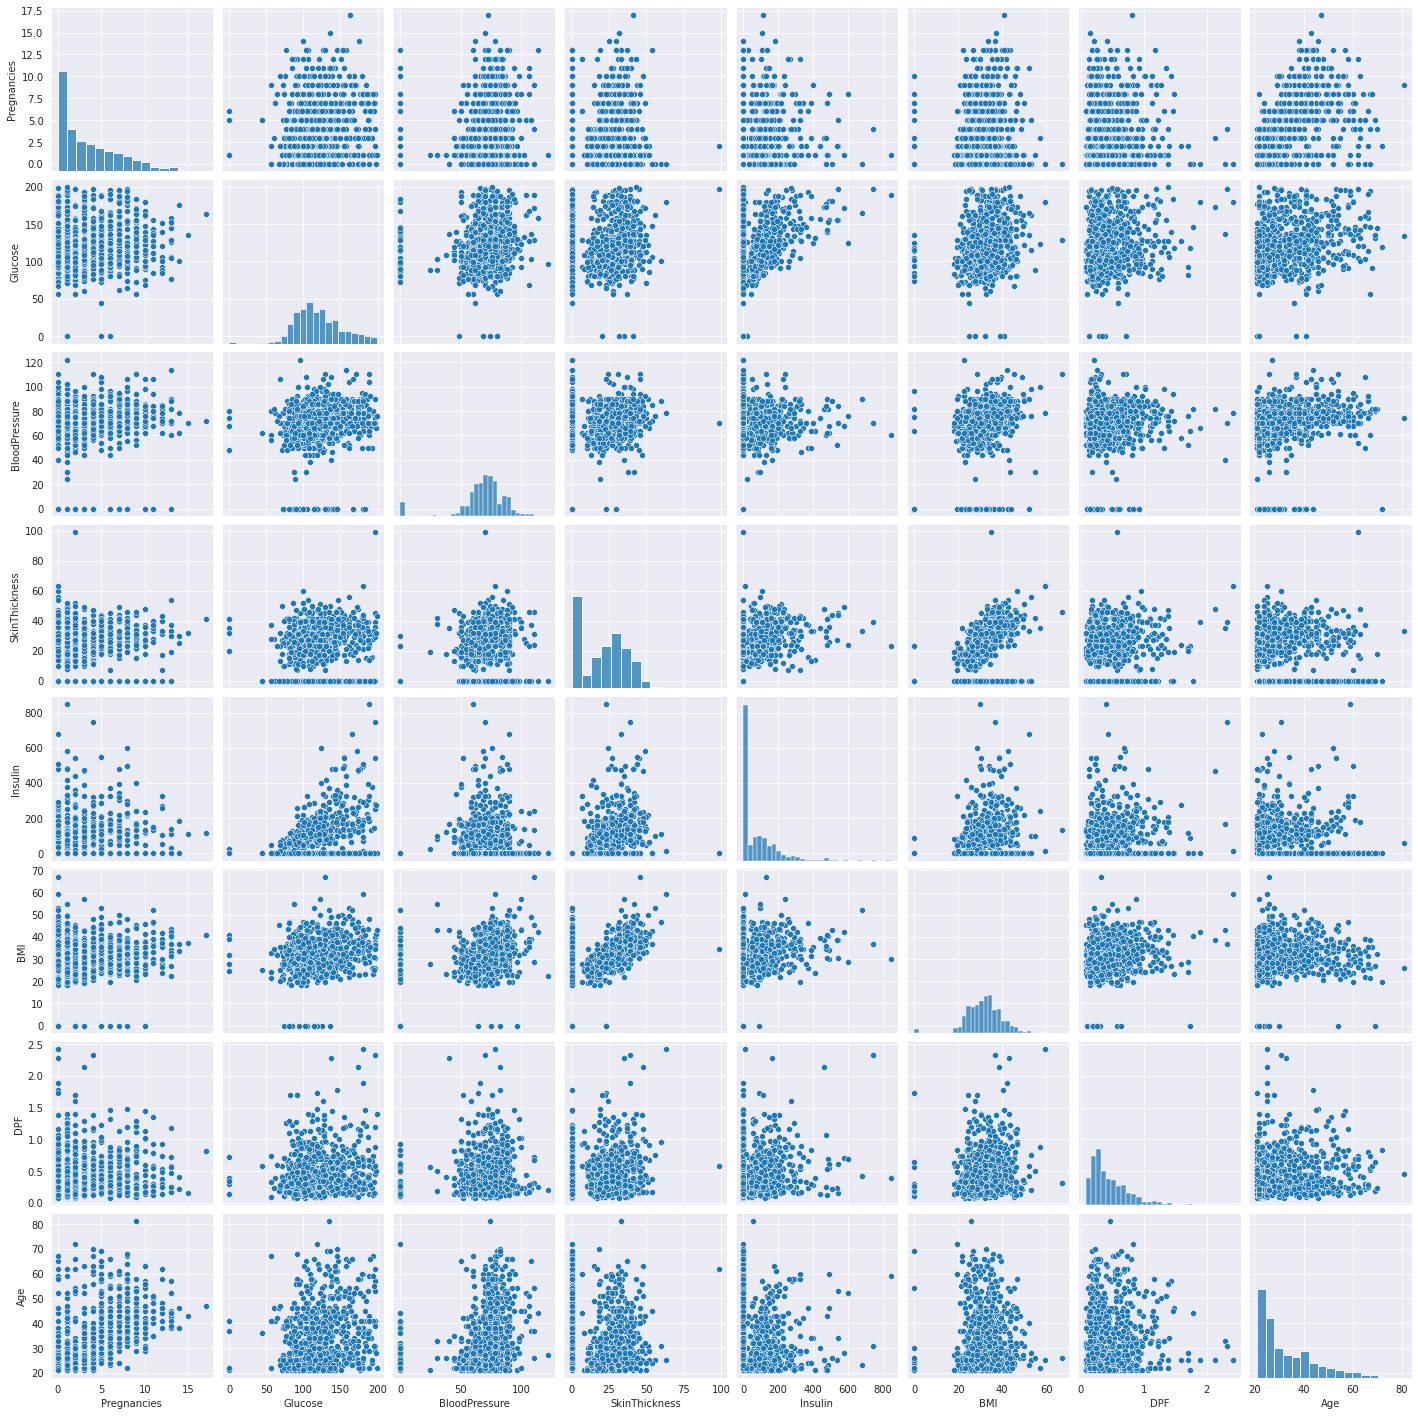

In [81]:
plt.figure(dpi=150)
sns.pairplot(df)
plt.show()

<Figure size 720x480 with 0 Axes>

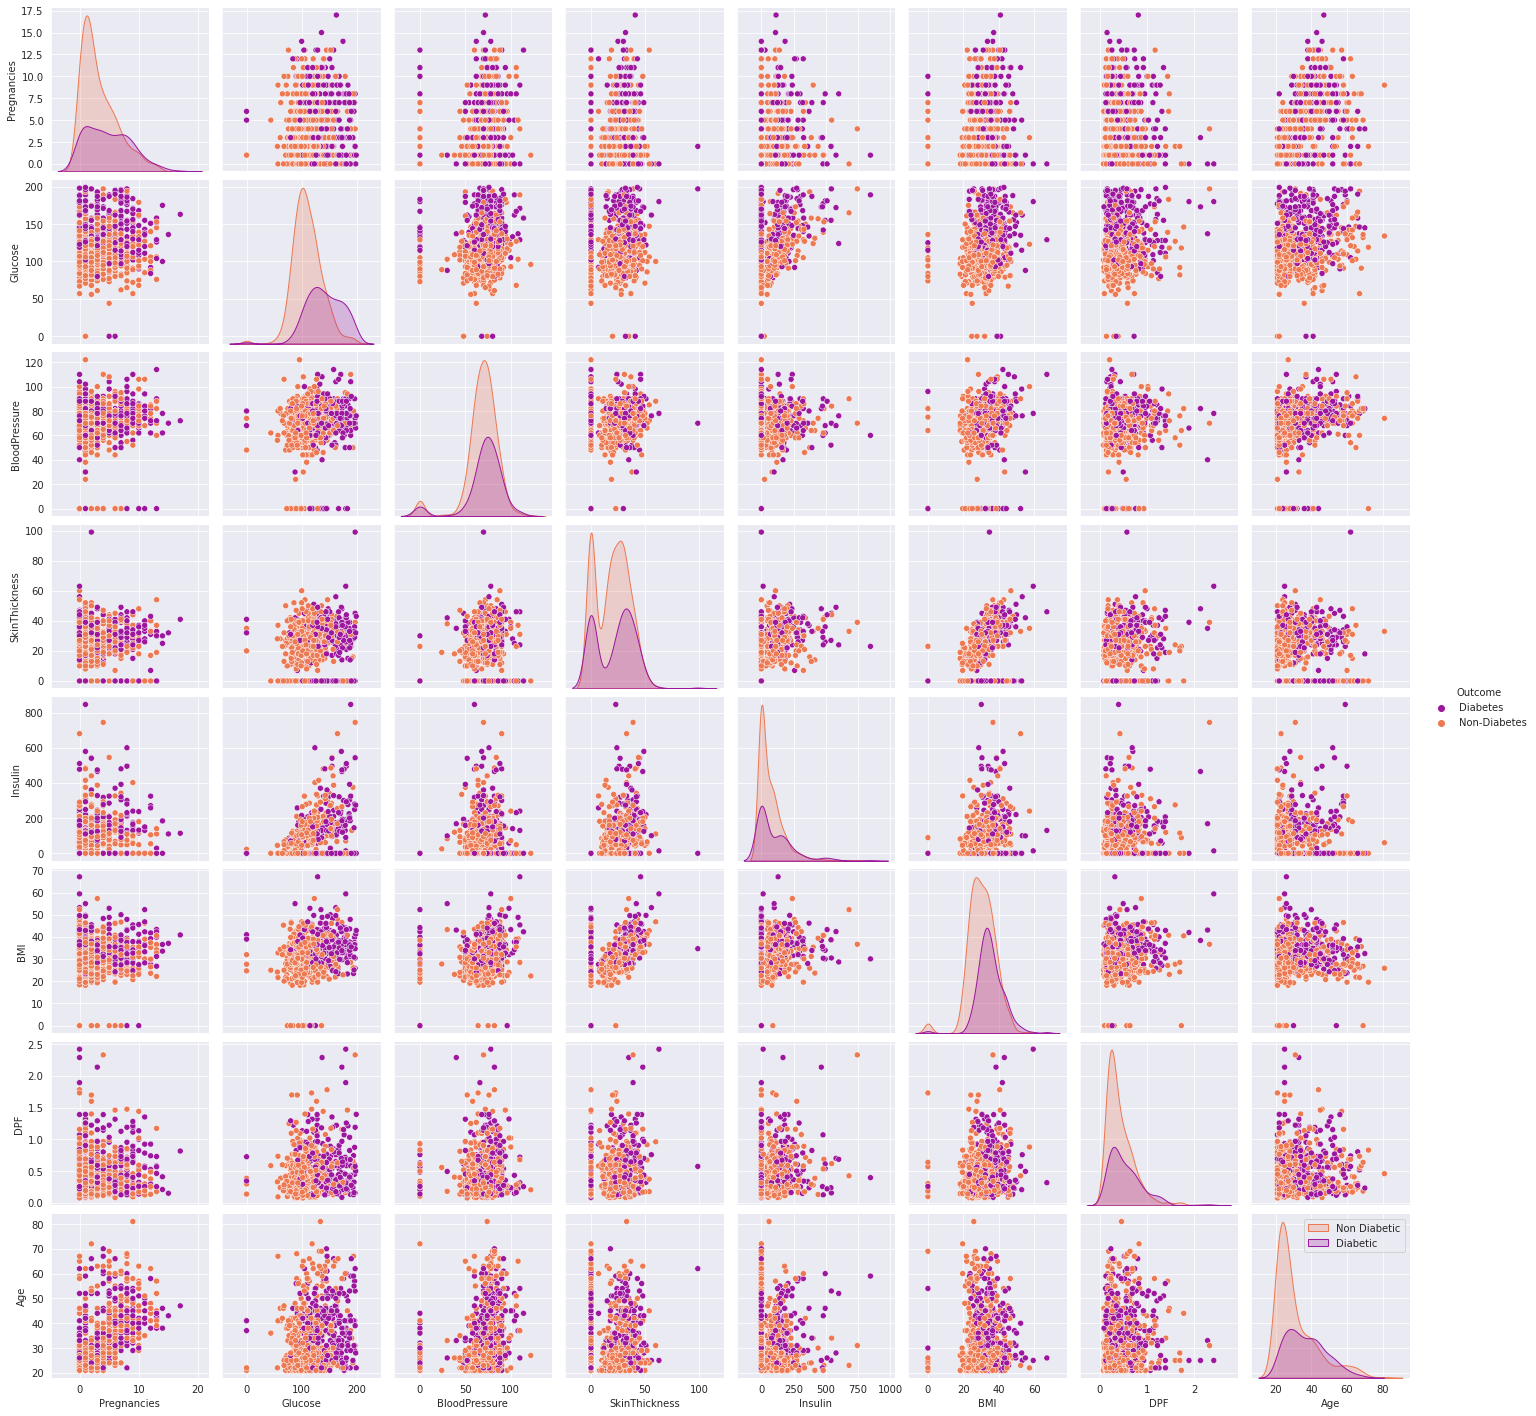

In [82]:
plt.figure(dpi = 120)
sns.pairplot(df,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

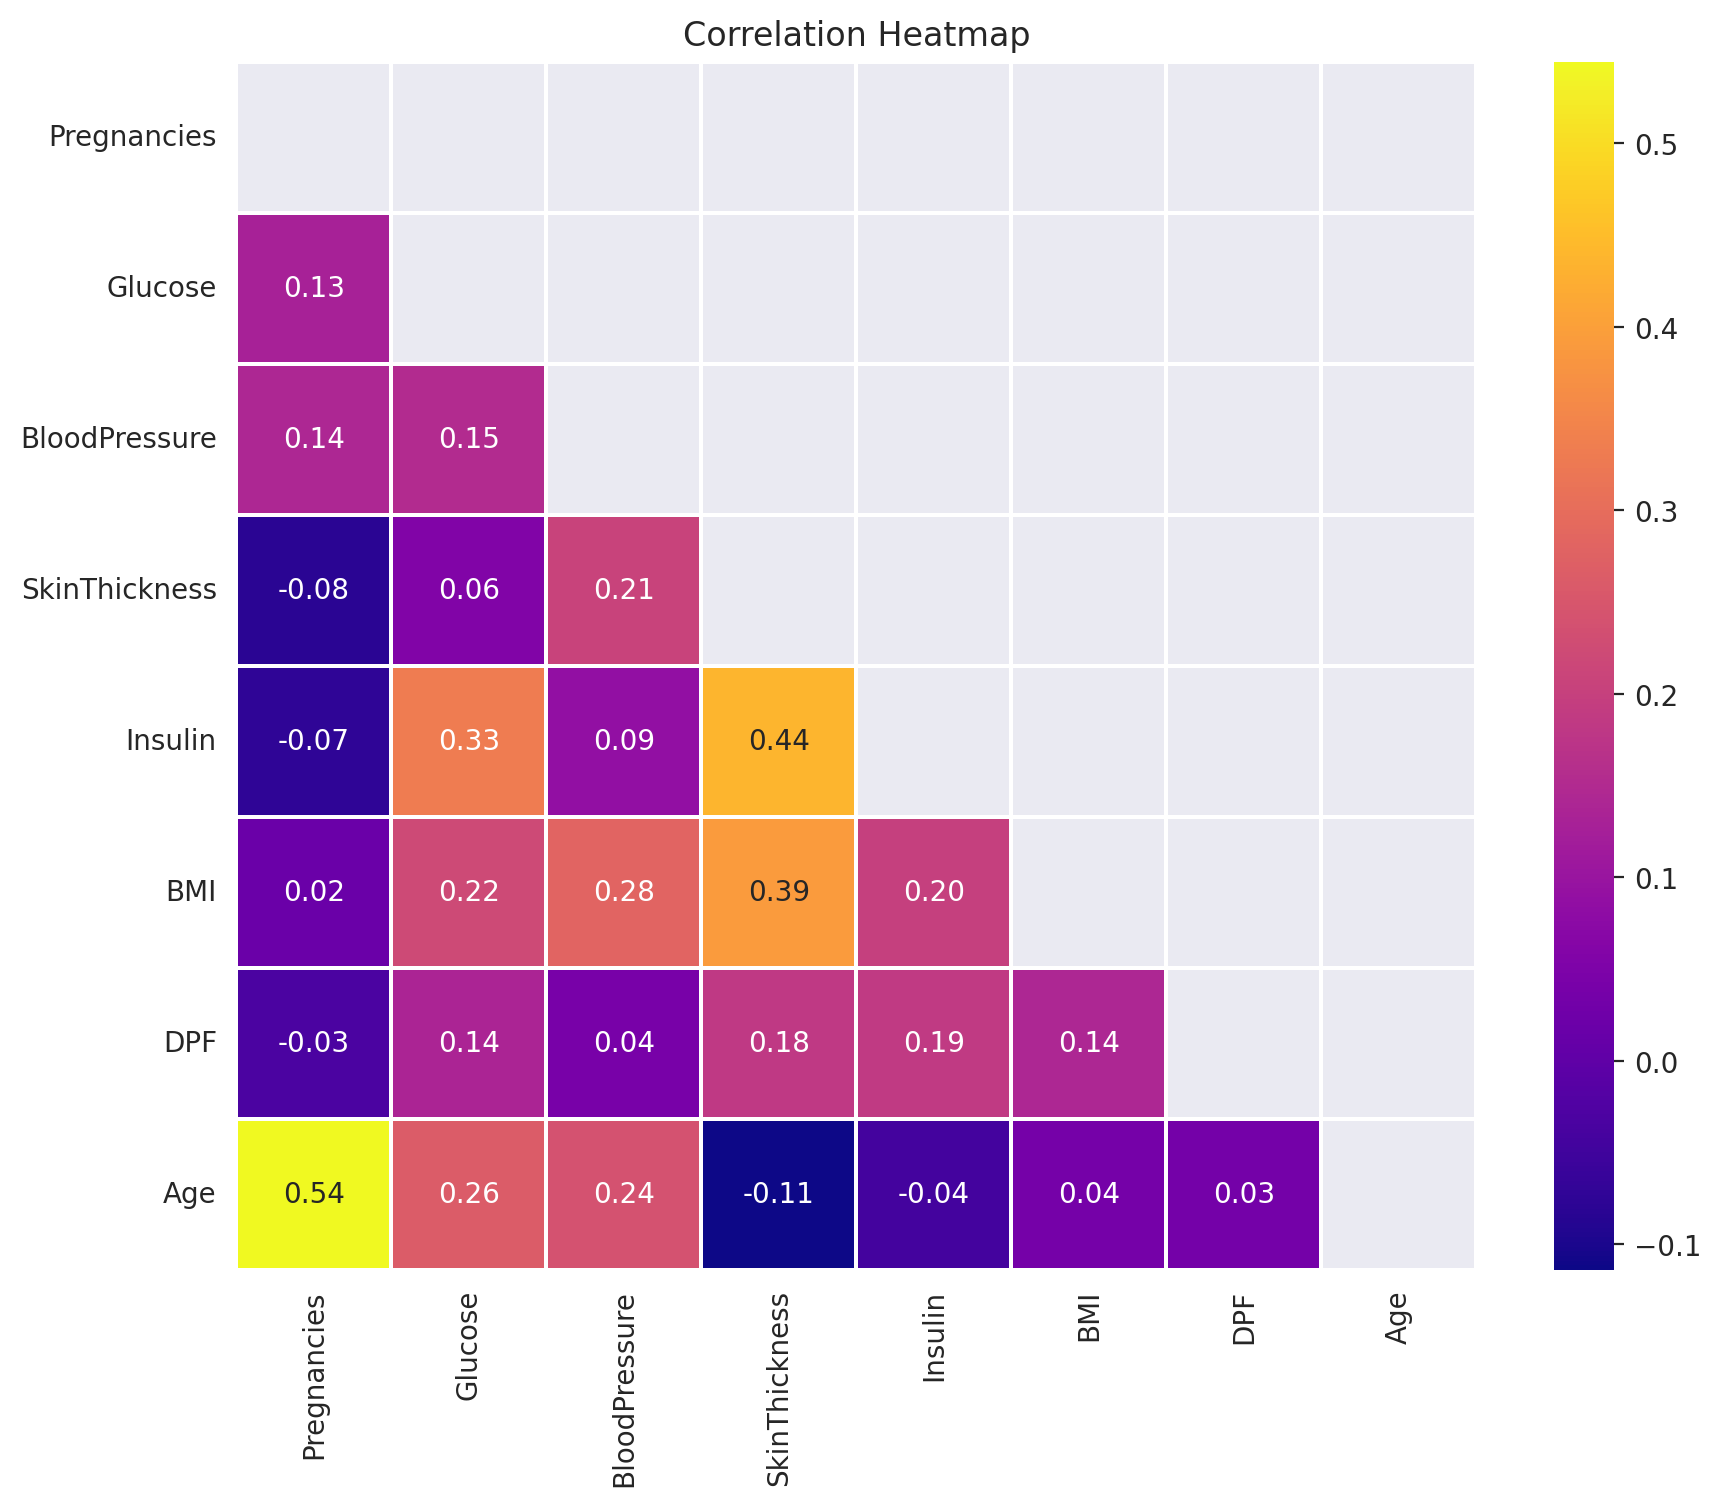

In [83]:
plt.figure(dpi = 200,figsize= (10,8))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Joint plot of Glucose with Other Variables ==> 

Correlation between Glucose and Pregnancies ==>  0.12945867149927248


<Figure size 800x400 with 0 Axes>

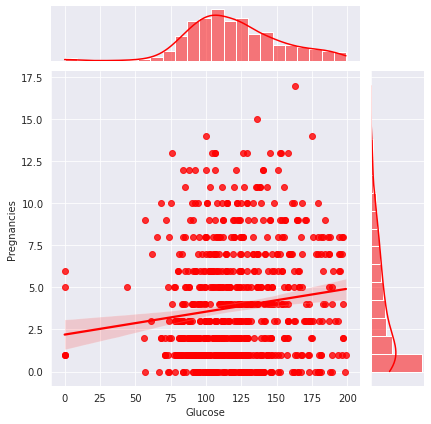

********************************************************************
Correlation between Glucose and BloodPressure ==>  0.1525895865686646


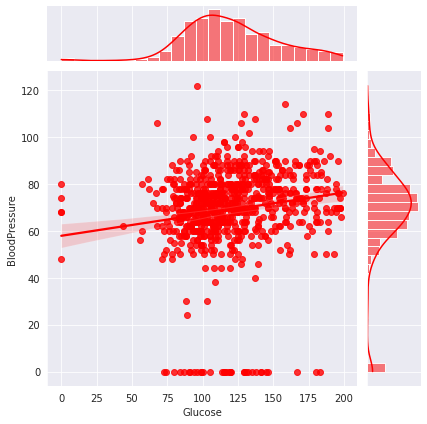

********************************************************************
Correlation between Glucose and SkinThickness ==>  0.05732789073817692


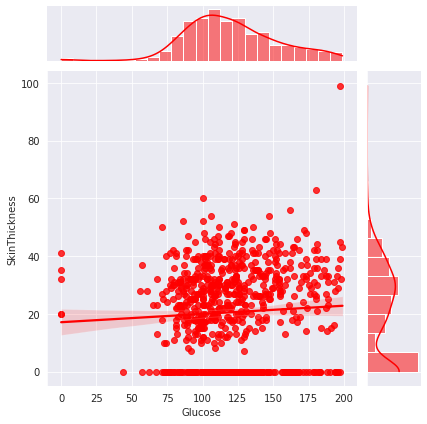

********************************************************************
Correlation between Glucose and Insulin ==>  0.3313571099202092


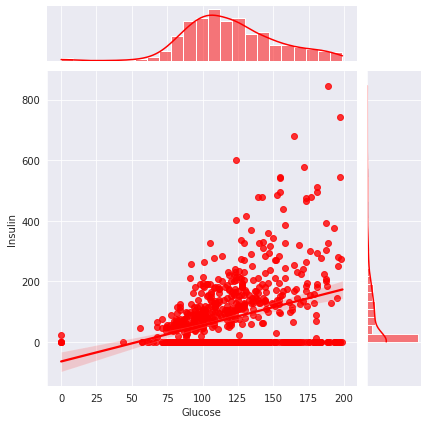

********************************************************************
Correlation between Glucose and BMI ==>  0.2210710694589828


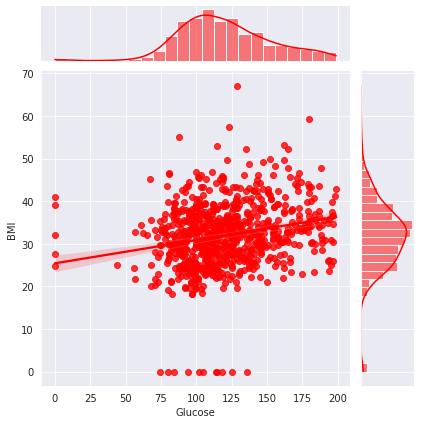

********************************************************************
Correlation between Glucose and DPF ==>  0.13733729982837092


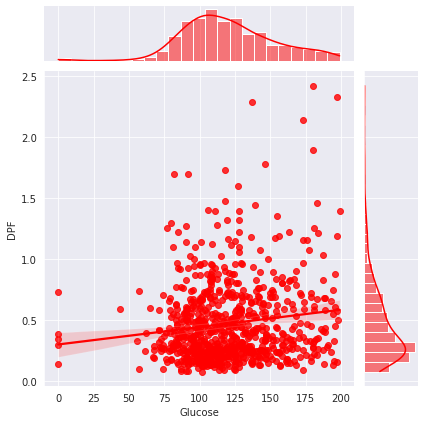

********************************************************************
Correlation between Glucose and Age ==>  0.26351431982433343


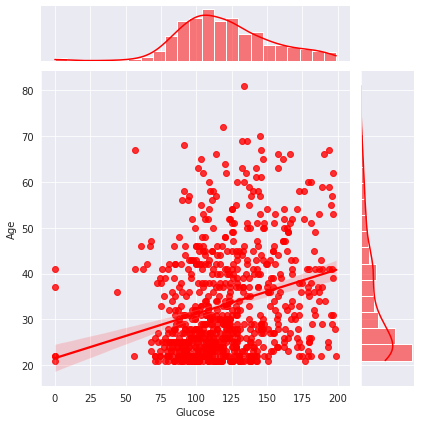

********************************************************************


In [91]:
plt.figure(dpi = 100, figsize = (8,4))
print("Joint plot of Glucose with Other Variables ==> \n")
df.Outcome = df.Outcome.replace({0:'Non-Diab',1:'Diab'})
df.DiabetesPedigreeFunction = df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()
for i in  df.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlation between Glucose and {i} ==> ",df.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=df,kind = 'reg',color = 'red')
        plt.show()
        print("********************************************************************")

Joint plot of SkinThickness with Other Variables ==> 

Correlation between SkinThickness and Insulin ==>  0.43678257012001326


<Figure size 800x600 with 0 Axes>

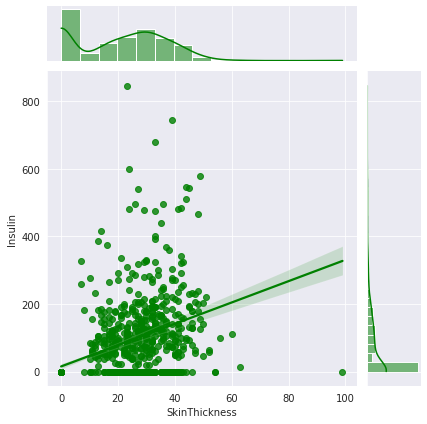

Correlation between SkinThickness and BMI ==>  0.39257320415903835


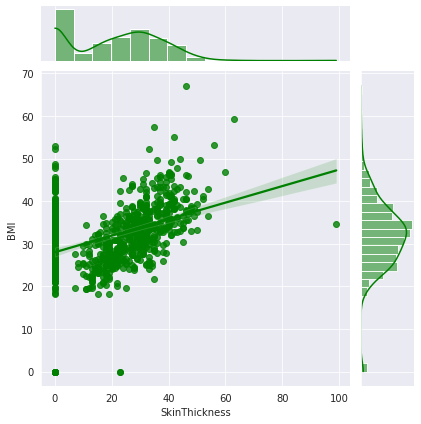

Correlation between SkinThickness and DPF ==>  0.1839275729541631


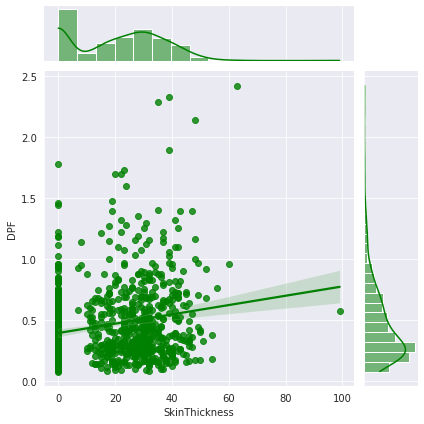

Correlation between SkinThickness and Age ==>  -0.11397026236774152


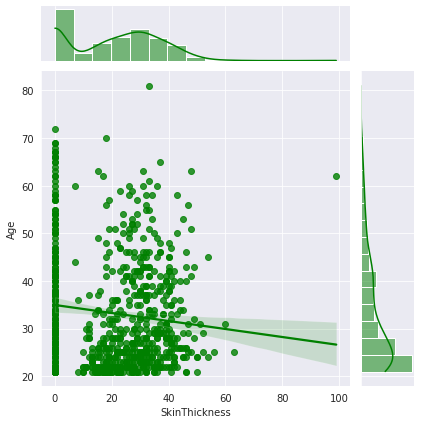

In [94]:
col = list(df.columns)
idx = col.index('SkinThickness')

plt.figure(dpi = 100, figsize = (8,6))
print("Joint plot of SkinThickness with Other Variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlation between SkinThickness and {col[i]} ==> ",df.corr().loc['SkinThickness'][col[i]])
    sns.jointplot(x='SkinThickness',y=col[i],data=df,kind = 'reg',color = 'green')
    plt.show()

Joint plot of Insulin with Other Variables ==> 

Correlation between Insulin and BMI ==>  0.19785905649310145


<Figure size 500x400 with 0 Axes>

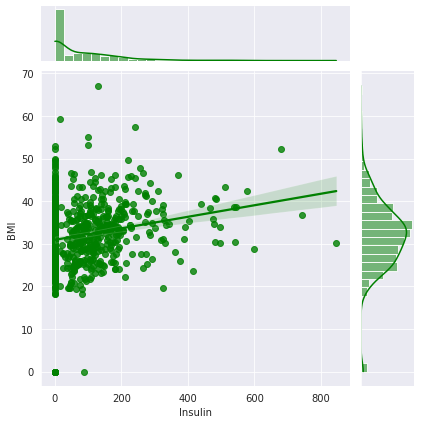

Correlation between Insulin and DPF ==>  0.1850709291680993


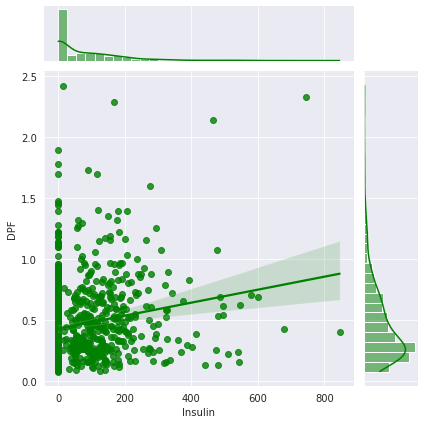

Correlation between Insulin and Age ==>  -0.04216295473537695


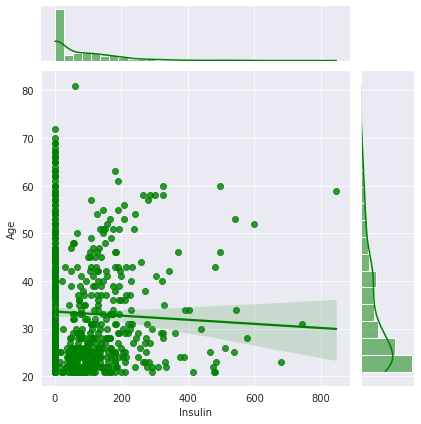

In [96]:
col = list(df.columns)
idx = col.index('Insulin')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Insulin with Other Variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlation between Insulin and {col[i]} ==> ",df.corr().loc['Insulin'][col[i]])
    sns.jointplot(x='Insulin',y=col[i],data=df,kind = 'reg',color = 'green')
    plt.show()

Joint plot of BMI with Other Variables ==> 

Correlation between BMI and DPF ==>  0.14064695254510523


<Figure size 800x600 with 0 Axes>

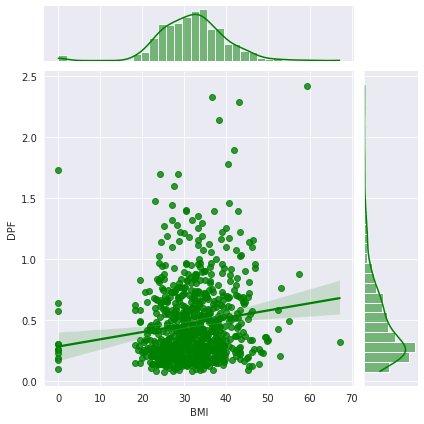

Correlation between BMI and Age ==>  0.03624187009229395


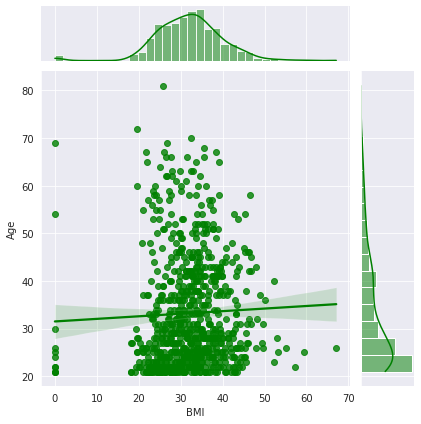

In [98]:
col = list(df.columns)
idx = col.index('BMI')

plt.figure(dpi = 100, figsize = (8,6))
print("Joint plot of BMI with Other Variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlation between BMI and {col[i]} ==> ",df.corr().loc['BMI'][col[i]])
    sns.jointplot(x='BMI',y=col[i],data=df,kind = 'reg',color = 'green')
    plt.show()